# Spotify Data EDA

In [1]:
import sys

from ctypes import DEFAULT_MODE
import os
from Data.Song import Song
from Data.SongStore import SongStore
from RecommendationSystem.Aggregator import Aggregator
from RecommendationSystem.Algorithms.CosineSimiliarity import CosineSimilarity
from RecommendationSystem.Algorithms.KNN import KNNRecommender
from RecommendationSystem.ColdStart.RandomSamplingStrategy import RandomSamplingStrategy
from UserProfileSystem.FeedbackSystem.NewFeedbackStrategy import NewFeedbackStrategy
from UserProfileSystem.UserProfile import UserProfile
from UserProfileSystem.UserProfileStore import UserProfileStore
from RecommendationSystem.Recommender import FeaturePrioritizationRecommender

In [2]:
SONG_DATABASE_CSV: str = "tracks_features.csv"
USERS_DATABASE_CSV: str = "users.csv"
# USERS_DATABASE_CSV = "mock_users.csv"
USER_PLAYLIST_CSV: str = "Data/adn-spotify-playlist_features-runaway.csv"
USERS_DATABASE_JSON = 'user_profiles.json'

DEFAULT_USER_ID: str = "1"

COSINE_SIMILARITY_WEIGHT: float = 0.5
KNN_WEIGHT: float = 0.5



print("Current Working Directory:", os.getcwd())

print(f"\nWelcome to SoundSage!")

# Load the dataset into memory.
print(f"\nLoading song data into memory from '{SONG_DATABASE_CSV}'...")

song_store: SongStore = SongStore(file_name=SONG_DATABASE_CSV)

# Get list of all songs from data.
print("\nGetting all songs...")
all_songs: list[Song] = song_store.get_all_songs()

# Load user profile database from file.
# TODO: are we using csv or json user database?
print(f"\nLoading user profile database from '{os.path.realpath(USERS_DATABASE_CSV)}' or '{os.path.realpath(USERS_DATABASE_JSON)}'...")
user_profile_store: UserProfileStore = UserProfileStore(USERS_DATABASE_CSV, USERS_DATABASE_JSON)

# Get user profile.
print(f"\nLoading user profile ID#{DEFAULT_USER_ID}...")
user_profile: UserProfile = user_profile_store.get_user_profile(DEFAULT_USER_ID)
if user_profile is None:
    print(f"\nUser profile ID#{DEFAULT_USER_ID} not found. Creating user profile ID#{DEFAULT_USER_ID} from songs CSV '{os.path.realpath(USER_PLAYLIST_CSV)}'...")
    user_profile: UserProfile = UserProfile.create_profile_from_songs_csv(DEFAULT_USER_ID, USER_PLAYLIST_CSV)
    
# Validate user profile.
user_profile.validate_features()
print(f"\nUser profile ID#{user_profile.user_id}:\n{user_profile}")

# cold start strategy
random_sampling_strategy: RandomSamplingStrategy = RandomSamplingStrategy(all_songs=all_songs)

# feedback strategy
feedback_strategy: NewFeedbackStrategy = NewFeedbackStrategy()

# recommendation algorithms
cosine_similarity: CosineSimilarity = CosineSimilarity(user_profile=user_profile, all_songs=all_songs)
knn: KNNRecommender = KNNRecommender(user_profile=user_profile, all_songs=all_songs)

# recommender
recommender_aggregator: Aggregator = Aggregator(
    user_id=DEFAULT_USER_ID,
    recommenders=[cosine_similarity, knn],
    weights=[COSINE_SIMILARITY_WEIGHT, KNN_WEIGHT],
    user_profile_store=user_profile_store,
    cold_start_strategy=random_sampling_strategy,
    feedback_strategy=feedback_strategy,  # Pass feedback strategy to aggregator
)

# Get the top 3 popular songs for cold start
print("\nGetting recommended songs...")
recommended_songs: list[Song] = recommender_aggregator.recommend()

print(f"\nRecommended songs: [")
i: int = 0
for song in recommended_songs:
    print(f"    ({i}) {song}")
    print(f"           Acousticness:     {song.acousticness:10.4f}")
    print(f"           Danceability:     {song.danceability:10.4f}")
    print(f"           Energy:           {song.energy:10.4f}")
    print(f"           Instrumentalness: {song.instrumentalness:10.4f}")
    print(f"           Liveness:         {song.liveness:10.4f}")
    print(f"           Loudness:         {song.loudness:10.4f}")
    print(
        f"           Popularity:       {song.popularity:10.4f}" if song.popularity is not None else f"           Popularity:             None")
    print(f"           Speechiness:      {song.speechiness:10.4f}")
    print(f"           Tempo:            {song.tempo:10.4f}")
    print(f"           Valence:          {song.valence:10.4f}")
    i += 1
print("]")

Current Working Directory: /Users/songlingjun/Documents/CSAlign Courses/CS5100 AI/soundsage/soundsage

Welcome to SoundSage!

Loading song data into memory from 'tracks_features.csv'...

Beginning data load from "Data/tracks_features.csv"...
 (100%) Loading song 1,204,025 of 1,204,025 (22,798 invalid songs discarded)...
Successfully loaded 1,181,227 of 1,204,025 songs from "Data/tracks_features.csv".

Getting all songs...

Loading user profile database from '/Users/songlingjun/Documents/CSAlign Courses/CS5100 AI/soundsage/soundsage/users.csv' or '/Users/songlingjun/Documents/CSAlign Courses/CS5100 AI/soundsage/soundsage/user_profiles.json'...

Loading user profile ID#1...

Fetching user profile ID#1 from /Users/songlingjun/Documents/CSAlign Courses/CS5100 AI/soundsage/soundsage/user_profiles.json...

User profile ID#1:
UserProfile ID #1 {
    Song count: 87
    Aggregated numerical features:
        Acousticness:         0.0747
        Danceability:         0.7643
        Energy:      

In [3]:
!pip install matplotlib


  Using cached contourpy-1.3.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.0-cp310-cp310-macosx_10_9_universal2.whl.metadata (164 kB)
  Using cached kiwisolver-1.4.7-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.0.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 50.1 MB/s eta 0:00:00
Using cached contourpy-1.3.1-cp310-cp310-macosx_11_0_arm64.whl (253 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.55.0-cp310-cp310-macosx_10_9_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.7-cp310-cp310-macosx_11_0_arm64.whl (64 kB)
Using cached pillow-11.0.0-cp310-cp310-macosx_11_0_arm64.whl (3.0 MB)
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)


In [4]:
import numpy as np

In [5]:
song_vector = []
# Hash every song into song vector for plotting
for song_origin in all_songs:
    song_vector.append(song_origin.to_vector())
# Turn song into numpy vectors 
song_vector = np.array(song_vector)





In [6]:
song_vector

array([[ 2.61000e-02,  4.70000e-01,  9.78000e-01, -5.39900e+00,
         1.17906e+02,  5.03000e-01],
       [ 1.29000e-02,  5.99000e-01,  9.57000e-01, -5.76400e+00,
         1.03680e+02,  4.89000e-01],
       [ 2.34000e-02,  3.15000e-01,  9.70000e-01, -5.42400e+00,
         1.49749e+02,  3.70000e-01],
       ...,
       [ 3.04000e-02,  7.85000e-01,  7.96000e-01, -5.96000e+00,
         1.21996e+02,  4.67000e-01],
       [ 6.97000e-05,  6.65000e-01,  8.56000e-01, -6.78800e+00,
         1.24986e+02,  2.27000e-01],
       [ 1.68000e-02,  7.36000e-01,  7.08000e-01, -9.27900e+00,
         1.17991e+02,  2.04000e-01]])

In [9]:
!pip install -U scikit-learn

  Using cached scipy-1.14.1-cp310-cp310-macosx_14_0_arm64.whl.metadata (60 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 41.8 MB/s eta 0:00:00 0:00:01
Using cached scipy-1.14.1-cp310-cp310-macosx_14_0_arm64.whl (23.1 MB)


In [10]:
import sklearn as sklearn

In [12]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim
# Documentations here: https://scikit-learn.org/1.5/modules/random_projection.html#random-projection
# Reduce higher dimension to lower dimension for plotting. 
# Ended up not having to use this one, but just kept for anyone's reference for reducing dimensions. 

In [13]:
# Reference for PCA https://scikit-learn.org/dev/auto_examples/decomposition/plot_pca_iris.html
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

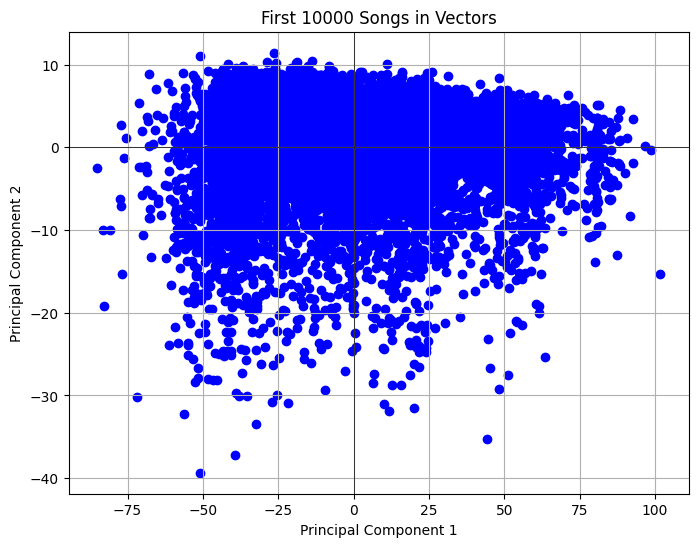

In [26]:
# Perform PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
data_2d = pca.fit_transform(song_vector[:10000])

# Plot as a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], color='blue')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid()
plt.title("First 10000 Songs in Vectors")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [27]:
# Get cosine and knn recommend songs
cosine_recommend = cosine_similarity.recommend()
knn_recommend = knn.recommend(5)


Recommended songs from cosine similarity: [
    (0) 'Mashshanebbu' by ['Enbilulugugal']
    (1) 'Immaterialized' by ['Psychedelic Speed Freaks']
    (2) 'New Values' by ['Bassholes']
    (3) 'I Hate It! (Long Version)' by ['Melt-Banana']
    (4) 'End Your Worries' by ['Psychedelic Speed Freaks']
]

Getting KNN recommendations for UserProfile ID #1 {
    Song count: 87
    Aggregated numerical features:
        Acousticness:         0.0747
        Danceability:         0.7643
        Energy:               0.8515
        Instrumentalness:     0.0000
        Liveness:             0.0002
        Loudness:           -19.8769
        Popularity:           0.0000
        Speechiness:          0.0032
        Tempo:              272.8117
        Valence:              0.4652

        Most common key:         -1
        Most common mode:        -1
        Explicit song ratio:     -1.0000
    Aggregated categorical and textual features:
        Top 5 Artists: [('The Jezabels', 10), ('U2', 4), ('Th

In [30]:
def convert_to_vector(songs): 
    song_vector = []
    # Hash every song into song vector for plotting
    for song_origin in songs:
        song_vector.append(song_origin.to_vector())
    # Turn song into numpy vectors 
    song_vector = np.array(song_vector)
    return song_vector

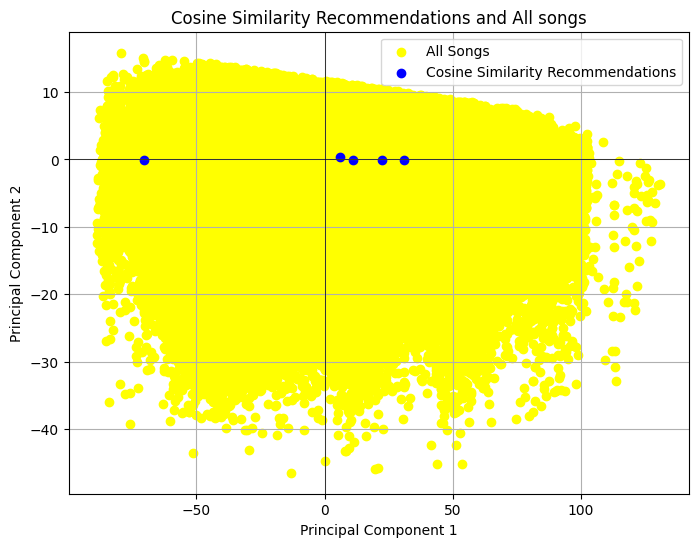

In [41]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(song_vector)
cosine_recommend_vector = convert_to_vector(cosine_recommend)
new_data_2d = pca.fit_transform(cosine_recommend_vector)
fig = plt.figure(figsize=(8, 6))

# Scatter plot for original data
plt.scatter(data_2d[:, 0], data_2d[:, 1], color='yellow', label="All Songs")

# Scatter plot for new data
plt.scatter(new_data_2d[:, 0], new_data_2d[:, 1], color='blue', label="Cosine Similarity Recommendations")

# Add grid, legend, and labels
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid()
plt.legend()
plt.title("Cosine Similarity Recommendations and All songs")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

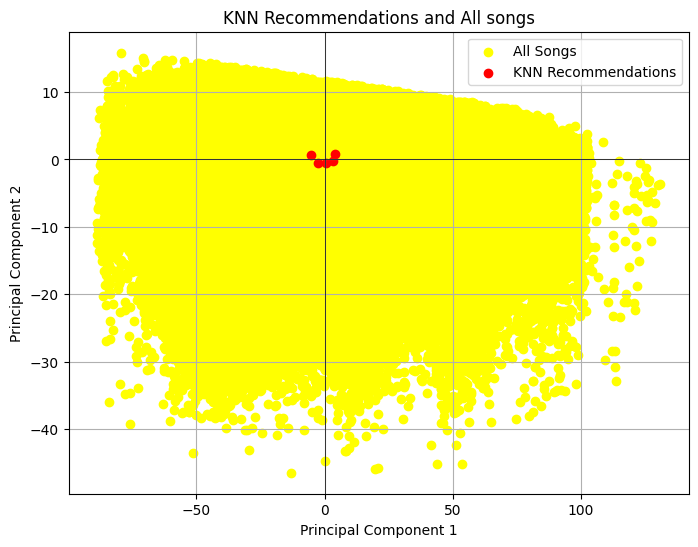

In [40]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(song_vector)
knn_recommend_vector = convert_to_vector(knn_recommend)
new_data_2d = pca.fit_transform(knn_recommend_vector)
plt.figure(figsize=(8, 6))

# Scatter plot for original data
plt.scatter(data_2d[:, 0], data_2d[:, 1], color='yellow', label="All Songs")

# Scatter plot for new data
plt.scatter(new_data_2d[:, 0], new_data_2d[:, 1], color='red', label="KNN Recommendations")

# Add grid, legend, and labels
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid()
plt.legend()
plt.title("KNN Recommendations and All songs")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

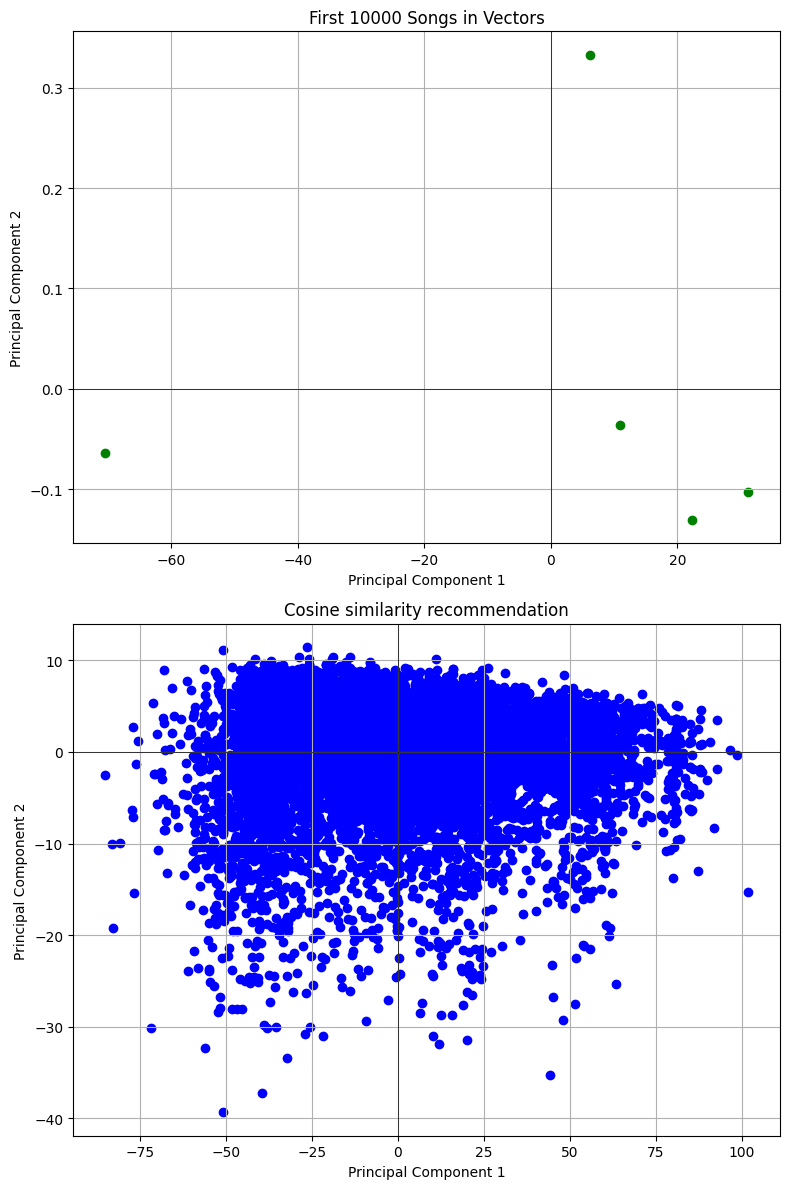

In [31]:
# PCA for cosine and overall song data
pca = PCA(n_components=2)
cosine_recommend_vector = convert_to_vector(cosine_recommend)
new_data_2d = pca.fit_transform(cosine_recommend_vector)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 12))

# First subplot: Scatter plot for new_data
axs[0].scatter(new_data_2d[:, 0], new_data_2d[:, 1], color='green')
axs[0].axhline(0, color='black', linewidth=0.5)
axs[0].axvline(0, color='black', linewidth=0.5)
axs[0].grid()
axs[0].set_title("First 10000 Songs in Vectors")
axs[0].set_xlabel("Principal Component 1")
axs[0].set_ylabel("Principal Component 2")

# Second subplot: Scatter plot for original data
axs[1].scatter(data_2d[:, 0], data_2d[:, 1], color='blue')
axs[1].axhline(0, color='black', linewidth=0.5)
axs[1].axvline(0, color='black', linewidth=0.5)
axs[1].grid()
axs[1].set_title("Cosine similarity recommendation")
axs[1].set_xlabel("Principal Component 1")
axs[1].set_ylabel("Principal Component 2")

# Show the plot
plt.tight_layout()
plt.show()

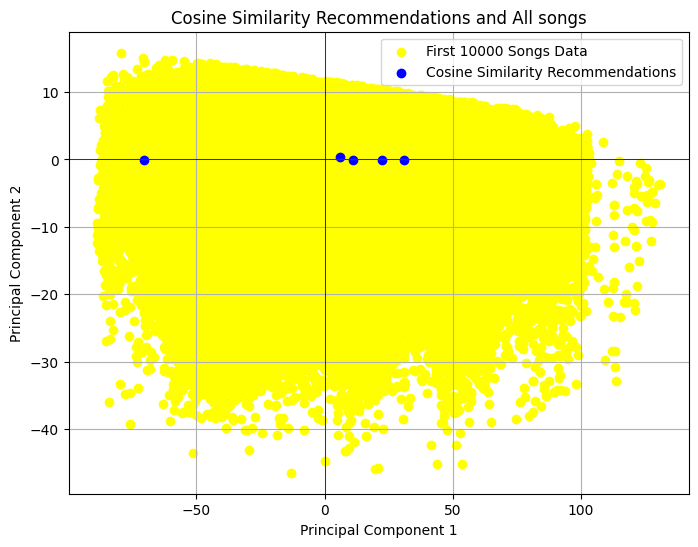

In [36]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(song_vector)
cosine_recommend_vector = convert_to_vector(cosine_recommend)
new_data_2d = pca.fit_transform(cosine_recommend_vector)
fig = plt.figure(figsize=(8, 6))

# Scatter plot for original data
plt.scatter(data_2d[:, 0], data_2d[:, 1], color='yellow', label="First 10000 Songs Data")

# Scatter plot for new data
plt.scatter(new_data_2d[:, 0], new_data_2d[:, 1], color='blue', label="Cosine Similarity Recommendations")

# Add grid, legend, and labels
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid()
plt.legend()
plt.title("Cosine Similarity Recommendations and All songs")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [ ]:
# Never ran. Not sure how to proceed with this so....
# Collect feedback from the user for each recommended song
print("\nProviding feedback...")
# Now, we apply feedback after recommendations (when feedback is received from the user)
feedback: dict[Song, int] = recommender_aggregator.get_feedback(recommended_songs)
recommender_aggregator.apply_feedback_to_profile(feedback)

# Print the updated user profile after feedback
print("\nUpdated user profile after feedback:")
user_profile = user_profile_store.get_user_profile(DEFAULT_USER_ID)
print(user_profile)